# EVALUATION METRICS 

## Classification

In [58]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, roc_auc_score, classification_report, plot_roc_curve, plot_precision_recall_curve

### Load Dataset

In [3]:
df_bank = pd.read_csv('bankloan.csv')
df_bank

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


### Data Splitting

In [9]:
X = df_bank[['employ', 'debtinc', 'creddebt', 'othdebt']]
y = df_bank['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

In [11]:
X_test.shape

(140, 4)

### Model (without cross validation)

In [13]:
# define model
logreg = LogisticRegression()

# fitting
logreg.fit(X_train, y_train)

# predict
y_pred = logreg.predict(X_test)

# metric (accuracy)
accuracy_score(y_test, y_pred)

0.8

### Cross Validation

Untuk memilih algoritma terbaik

In [15]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [16]:
# define benchmark model

logreg = LogisticRegression()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(max_depth=3, random_state=10)

#### Accuracy

In [27]:
# define fold
skfold = StratifiedKFold(n_splits=5)

# melakukan cross validation (dilakukan pada train set)
logreg_cv = cross_val_score(logreg, X_train, y_train, cv=skfold, scoring='accuracy')
knn_cv = cross_val_score(knn, X_train, y_train, cv=skfold, scoring='accuracy')
tree_cv = cross_val_score(tree, X_train, y_train, cv=skfold, scoring='accuracy')

print(logreg_cv, 'logreg')
print(knn_cv, 'knn')
print(tree_cv, 'tree')

[0.76785714 0.80357143 0.875      0.8125     0.77678571] logreg
[0.69642857 0.77678571 0.78571429 0.79464286 0.76785714] knn
[0.75       0.77678571 0.79464286 0.76785714 0.70535714] tree


In [28]:
# from sklearn.metrics import SCORERS
# SCORERS.keys()

In [30]:
# Rata-rata accuracy (pilih yang paling tinggi)

print(logreg_cv.mean(), 'logreg')
print(knn_cv.mean(), 'knn')
print(tree_cv.mean(), 'tree')

0.8071428571428572 logreg
0.7642857142857142 knn
0.7589285714285714 tree


In [31]:
# Standard Deviation(cari yang std paling kecil, artinya model paling stabil)

print(logreg_cv.std(), 'logreg')
print(knn_cv.std(), 'knn')
print(tree_cv.std(), 'tree')

0.037711985860612265 logreg
0.03508371911497947 knn
0.030409618510582836 tree


**Kesimpulan**

- Kita mencoba 3 benchmark model dengan algoritma berbeda
- Kita melakukan cross validation dengan 5 fold
- Evaluation metric yang digunakan adalah accuracy
- Rata-rata cross val score paling tinggi adalah model dengan menggunakan Logistic Regression
- Standard dev cross val score paling rendah adalah model dengan menggunakan Decision Tree

- Benchmark Model terbaik adalah **Logistic Regression**, karena rata-rata accuracy-nya paling tinggi, dan std-nya walaupun lebih besar, tetapi tidak berbeda jauh dari Decision Tree 


#### Fucntion for cross validation

In [39]:
# create function

def model_evaluation_cv(model, metric):

    skfold = StratifiedKFold(n_splits=5)
    model_cv = cross_val_score(model, X_train, y_train, cv=skfold, scoring=metric)
    
    print(model)
    print('Hasil Corss Val: ', model_cv)
    print('Rata-rata: ', model_cv.mean())
    print('St dev: ', model_cv.std())
    print()

In [40]:
# accuracy

model_evaluation_cv(logreg, 'accuracy')
model_evaluation_cv(knn, 'accuracy')
model_evaluation_cv(tree, 'accuracy')

# best model: logreg

LogisticRegression()
Hasil Corss Val:  [0.76785714 0.80357143 0.875      0.8125     0.77678571]
Rata-rata:  0.8071428571428572
St dev:  0.037711985860612265

KNeighborsClassifier()
Hasil Corss Val:  [0.69642857 0.77678571 0.78571429 0.79464286 0.76785714]
Rata-rata:  0.7642857142857142
St dev:  0.03508371911497947

DecisionTreeClassifier(max_depth=3, random_state=10)
Hasil Corss Val:  [0.75       0.77678571 0.79464286 0.76785714 0.70535714]
Rata-rata:  0.7589285714285714
St dev:  0.030409618510582836



In [41]:
# f1 score

model_evaluation_cv(logreg, 'f1')
model_evaluation_cv(knn, 'f1')
model_evaluation_cv(tree, 'f1')

# best model: logreg

LogisticRegression()
Hasil Corss Val:  [0.45833333 0.54166667 0.75862069 0.55319149 0.44444444]
Rata-rata:  0.5512513246922637
St dev:  0.1123736145364938

KNeighborsClassifier()
Hasil Corss Val:  [0.39285714 0.48979592 0.53846154 0.54901961 0.48      ]
Rata-rata:  0.49002684150583314
St dev:  0.055441153597079934

DecisionTreeClassifier(max_depth=3, random_state=10)
Hasil Corss Val:  [0.3        0.44444444 0.53061224 0.53571429 0.32653061]
Rata-rata:  0.42746031746031743
St dev:  0.09907637485112282



In [44]:
# proporsi target

df_bank['default'].value_counts() /700 *100

# data cukup imbalance, jadi kita lebih baik menggunakan f1 score sebagai metricnya

0    73.857143
1    26.142857
Name: default, dtype: float64

### Predict Test Set

- Benchmark model terbaik sudah dipilih: Logistic Regression
- Sekarang kita prediksi test set menggunakan model terpilih

In [47]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
f1_score(y_test, y_pred)

0.588235294117647

In [51]:
# menampilkan beberpa metric sekaligus

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       103
           1       0.65      0.54      0.59        37

    accuracy                           0.80       140
   macro avg       0.74      0.72      0.73       140
weighted avg       0.79      0.80      0.79       140



In [52]:
confusion_matrix(y_test, y_pred)

array([[92, 11],
       [17, 20]], dtype=int64)

Text(51.0, 0.5, 'Actual')

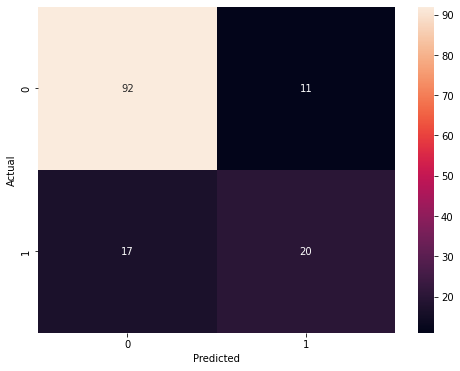

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

plt.xlabel('Predicted')
plt.ylabel('Actual')


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


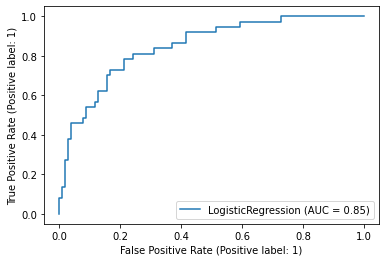

In [59]:
plot_roc_curve(logreg, X_test, y_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


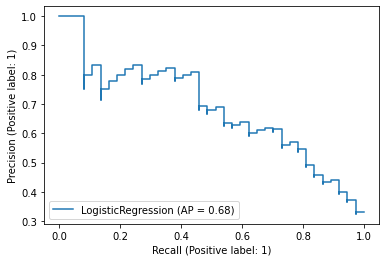

In [60]:
# Precision Recall Curve

plot_precision_recall_curve(logreg, X_test, y_test)